In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Scatter plots

Scatter plots are used when both the variables are numerical and it helps us understand the relation.

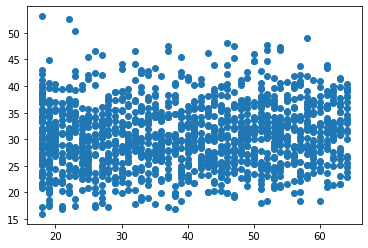

In [6]:
plt.scatter(df['age'],df['bmi']) 
plt.show()

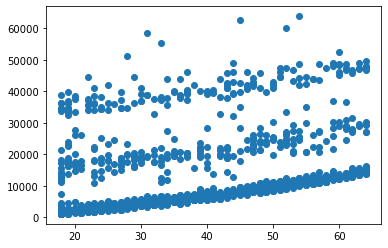

In [7]:
plt.scatter(df['age'],df['charges'])
plt.show()

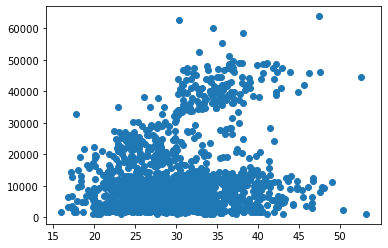

In [8]:
plt.scatter(df['bmi'],df['charges'])

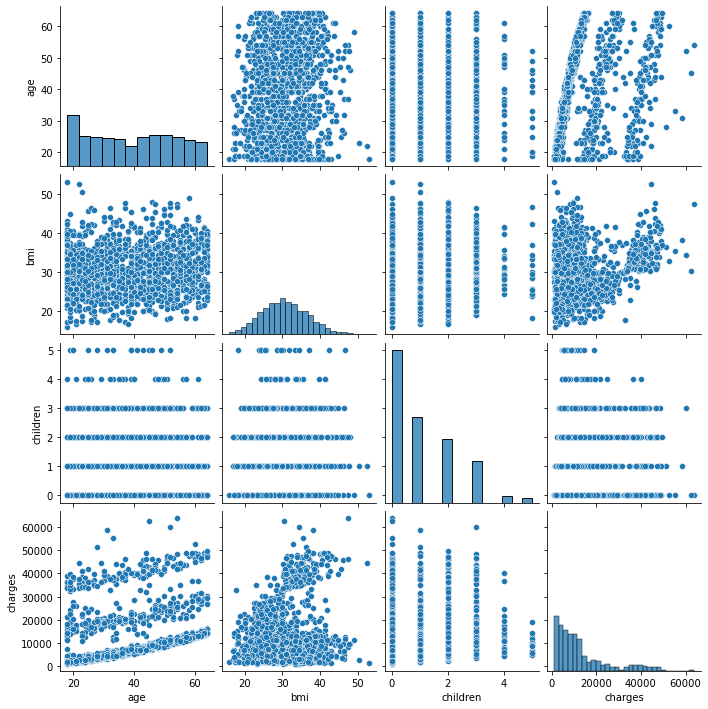

In [23]:
sns.pairplot(df) 

# Barplots

Barplots are used when we want to find the relation between one categorical and one numerical variable

<BarContainer object of 1338 artists>

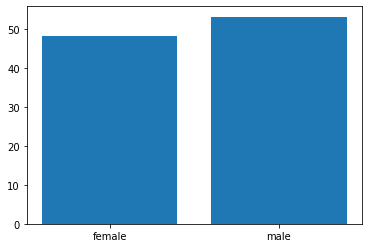

In [9]:
plt.bar(df['sex'],df['bmi'])

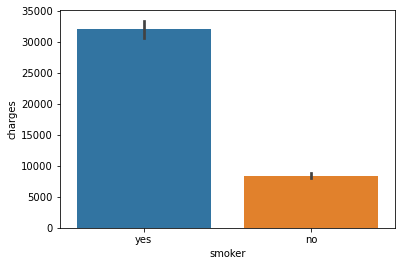

In [10]:
sns.barplot(x = 'smoker',y = 'charges',data = df)
plt.show()

The black line in the barplot represents the confidence interval for the variable i.e. it's interval where the 95% (ci=95 is the default value default) of your variable lies in, which is estimated by bootstrapping method (in statistics).

# Catplots

A catplot is a combination of a scatter plot and a bar

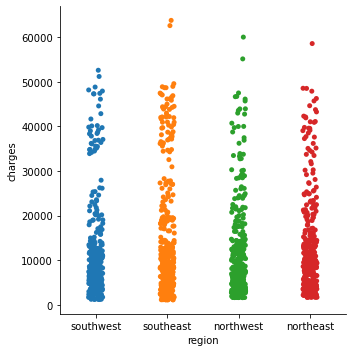

In [11]:
sns.catplot(x='region', y='charges', data=df)
plt.show()

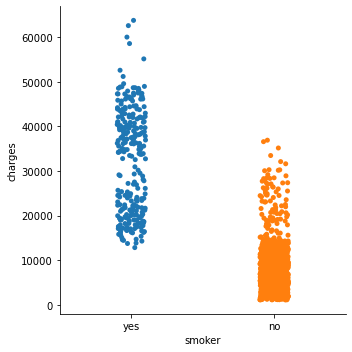

In [12]:
sns.catplot(x='smoker', y='charges', data=df)

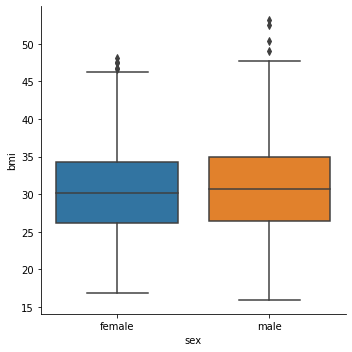

In [21]:
sns.catplot(x="sex", y="bmi", kind="box", data=df)

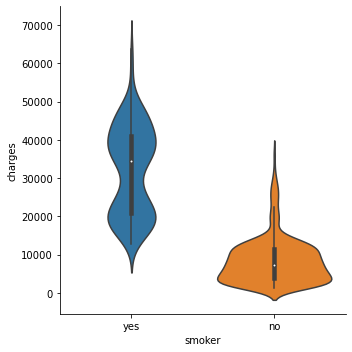

In [22]:
sns.catplot(x="smoker", y="charges", kind="violin", data=df)
plt.show()

# Mosaic Plot

A mosaic plot helps us understand the relation between 2 categoricals columns

In [13]:
crosstab=pd.crosstab(index=df['sex'], columns=df['smoker'])
crosstab #a crosstab needs to be created in order to get the values required for a mosaic plot. 

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

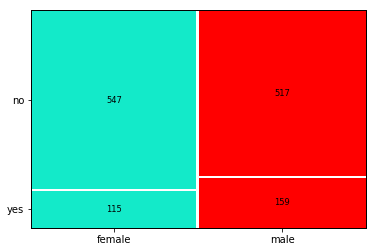

In [15]:
props={}
props[('male','yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('male','no')]={'facecolor':'red', 'edgecolor':'white'}
props[('female','yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('female','no')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
labelizer=lambda k:{('male','yes'):159,('female','yes'):115,('male','no'):517,('female','no'):547}[k]
mosaic(df,['sex','smoker'],labelizer=labelizer,properties=props)
plt.show()

# Correlation

Correlation coefficient formulas are used to find how strong a relationship is between 2 varaibles. The formulas return a value between -1 and 1, where:
1 indicates a strong positive relationship.
-1 indicates a strong negative relationship.
A result of zero indicates no relationship at all.


In [16]:
df['bmi'].corr(df['charges'])

0.19834096883362884

In [17]:
df['age'].corr(df['bmi'])

0.10927188154853514

In [18]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

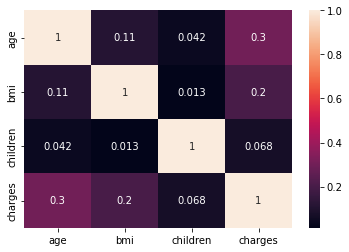

In [20]:
sns.heatmap(df.corr(),annot=True)

# Simple linear regression

Using this method we can understand the exact relation between an independent and dependent variable. This will further help us during th model building step.

In [19]:
import statsmodels.api as sm
y = df['charges']
x = df['bmi']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           2.46e-13
Time:                        11:36:16   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

C:\Users\nidhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the model summary we can see that the fitted regression equation.
P>|t|: This is the p-value associated with the model coefficients. Since the p-value for bmi (0.000) is significantly less than .05, we can say that there is a statistically significant association between hours and score.
R-squared: This number tells us the percentage of the variation in the charges can be explained by the bmi.
F-statistic & p-value: The F-statistic (54.71) and the corresponding p-value (2.46e-13) tell us the overall significance of the regression model, i.e. whether explanatory variables in the model are useful for explaining the variation in the response variable.Since the p-value in this example is less than .05, our model is statistically significant.
